# Unsupervised machine learning

In today's lesson we will run different types of topic models on Kenyan court dataset that you will use for your research paper.

Let's begin by running some prepatory commands.

In [346]:
%matplotlib inline

import warnings, logging

warnings.filterwarnings("ignore",category=DeprecationWarning) #ignore warnings
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR) 
#logging is a means of tracking events that happen when some software runs.

Now let's load our data. I've pickled the dataframe as a serialized python object for an important reason: the length of certain decisions are longer than what can be printed in Microsoft Excel.

In [349]:
import pickle
import pandas as pd

pickle_root = '/Users/fionashenbayh/Documents/Fall 2018/kenya_case_law/pickles/'

df = pd.read_pickle(pickle_root+'kenya_full_decisions_ALL.pickle')

Let's look at the data structure

In [350]:
df.head()

Advocates Case Action Case Class  \
2013 0                                              -           -   Criminal   
     1                                              -    Judgment   Criminal   
     2                                              -           -   Criminal   
     3  Alando for the applicant\nTanui for the state      Ruling   Criminal   
     4                                              -           -   Criminal   

                         Case Number Case Subject  \
2013 0      Criminal Case 46 of 2012            -   
     1  Criminal Appeal  56 of 2012.            -   
     2   Criminal Appeal 462 of 2006            -   
     3  Criminal Revision 76 of 2013            -   
     4   Criminal Appeal 102 of 1998            -   

                                                     Citation  \
2013 0          republic v elizabeth wambui wanjiku[2013]eklr   
     1  joseph ekiru alias maji/lokipi v republic [2013] eklr   
     2     kelvin munyua ndungã¢â¬â¢u v republic[2013] eklr   
     3   henry kamiti chege & 2 others v republic [2013] eklr   
     4                     ezra nkumbuku v republic[2013]eklr   

                                              Court Date Delivered  \
2013 0  High Court at Nairobi (Milimani Law Courts)    08 May 2013   
     1                         High Court at Kitale    26 Sep 2013   
     2  High Court at Nairobi (Milimani Law Courts)    14 Mar 2013   
     3                        High Court at Mombasa    28 Aug 2013   
     4                           High Court at Meru    26 Mar 2013   

                                                                allegations  \
2013 0                                                                  NaN   
     1  alleged incident and assessed her age to be approximately 15 years.   
     2                                                                  NaN   
     3                                                                  NaN   
     4                                                                  NaN   

                              appellant  ...  \
2013 0                        republic   ...   
     1  joseph ekiru alias maji/lokipi   ...   
     2    kelvin munyua ndungã¢â¬â¢u   ...   
     3   henry kamiti chege & 2 others   ...   
     4                   ezra nkumbuku   ...   

                                                                                              decision_full  \
2013 0  \n \n republic of kenya\n \n high court at nairobi nairobi law courts\n \n criminal case 46 of 2...   
     1  \n \n republic of kenya\n \n in the high court of kenya at kitale\n \n criminal appeal no 56 of ...   
     2  \n \n republic of kenya\n \n high court at nairobi nairobi law courts\n \n criminal appeal 462 o...   
     3  \n \n republic of kenya\n \n in the high court of kenya\n \n at mombasa\n \n criminal revision n...   
     4  \n \n republic of kenya\n \n high court at meru\n \n criminal appeal 102 of 1998\n \n \n \n \n e...   

                        judge1 judge2 judge3  \
2013 0                           None   None   
     1  Joseph Raphael Karanja   None   None   
     2                           None   None   
     3             Martin Muya   None   None   
     4                           None   None   

                                                                                          offences  \
2013 0                                                                                         NaN   
     1                                                                                         NaN   
     2             offence of robbery with violence contrary to section 296 (2) of the penal code.   
     3  offence of attempted robbery with violence contrarily to section 297(2) of the penal code.   
     4                                                                                         NaN   

                       prison_sentence         respondent respondent_lawyer  \
2013 0              

### Exploring the data

What are the variables contained in the dataframe?

In [351]:
df.columns

Index(['Advocates', 'Case Action', 'Case Class', 'Case Number', 'Case Subject',
       'Citation', 'Court', 'Date Delivered', 'allegations', 'appellant',
       'appellant_lawyer', 'case', 'case_no', 'case_no_year', 'charges',
       'convictions', 'county', 'criminal_counts', 'death_sentence',
       'decision', 'decision_1', 'decision_10', 'decision_11', 'decision_12',
       'decision_13', 'decision_14', 'decision_15', 'decision_16',
       'decision_17', 'decision_18', 'decision_19', 'decision_2',
       'decision_20', 'decision_21', 'decision_22', 'decision_3', 'decision_4',
       'decision_5', 'decision_6', 'decision_7', 'decision_8', 'decision_9',
       'decision_abr', 'decision_full', 'judge1', 'judge2', 'judge3',
       'offences', 'prison_sentence', 'respondent', 'respondent_lawyer',
       'state_lawyer', 'stroke_sentence'],
      dtype='object')

### Exploring case content

Before doing any kind of computation analysis, it is a good idea to explore the corpus yourself -- in other words, read some of the actual decisions!

Exploring the corpus by hand helps you build a theoretical model for later analysis. But a lot of the pre-processing steps you take will be critically informed by what you understand about the text. And to that end, there's no substitute for deep reading.

In [352]:
df.decision_full[0] , df.decision_full[1] , df.decision_full[2]

('\n \n republic of kenya\n \n high court at nairobi nairobi law courts\n \n criminal case 46 of 2012\n republicprosecutor\n \n versus \n \n elizabeth wambui wanjikuaccused\n \n court\n order\n  the accused is hereby placed on probation for a period of three 3 yearsshe is briefed and warned of the consequences of condition breach\n \n f muchemi\n judge\n 8513\n \n ',
 '\n \n republic of kenya\n \n in the high court of kenya at kitale\n \n criminal appeal no 56 of 2012\n \n joseph ekiru alias majilokipi  appellant\n \n versus\n \n republic  respondent\n \n being an appeal from the original conviction and sentence of t nzioki   srm in criminal case no 2532011 delivered on 4th april 2012 at lodwar\n \n j u d g m e n t\n \n \t the appellant joseph ekiru alias majilokipi appeared before the senior resident magistrate at kakuma charged with defilement contrary to section 8 1 read with section 8 3 of the sexual offences act in that on the 5th april 2011 at particulars withheldturkana west dis

### Convert documents to vectors

Once we have a sense of what's contained in the corpus, we can make better decisions in deciding how to preprocess our corpus.

Like last time, let's start by transforming the data into a document-term matrix using the CountVectorizer class. We specifically want to transform the raw text of each judicial decision, i.e. the column called **'decision_full'**.

Pay attention to how we need to modify the pandas dataframe object in order to use **vectorizer.fit_transform()**. Also note that the following cell will take awhile to run -- we're transforming over 27,000 documents!

In [355]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
        
vectorizer = CountVectorizer(min_df=15, # min_df: discard words appearing in fewer than n documents, percentage or count
                             max_df=.90, # max_df: discard words appearing in more than n documents, percentage or count
                             decode_error='replace',
                             strip_accents='unicode', # noticed some encoding errors when examining the dataframe
                             stop_words='english')

dtm = vectorizer.fit_transform(df.decision_full.astype(str).to_list()) #requires iterable object over raw text documents
vocab = vectorizer.get_feature_names()

dtm = dtm.toarray()
vocab = np.array(vocab)

In [356]:
dtm.shape

(21747, 19311)

## A topic model

Let's try running an Latent Dirichlet Allocation topic model using the sklearn package.

Executing the following code will take some time, especially if your dtm is large.

In [357]:
from sklearn.decomposition import LatentDirichletAllocation

# Run LDA

lda = LatentDirichletAllocation(n_topics=10, 
                                max_iter=5,#maximum number of iterations 
                                learning_method='online', #Method used to update 
                                learning_offset=50,
                                random_state=0).fit(dtm)


# Display top words associated with each topic

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
no_top_words = 15
display_topics(lda, vocab, no_top_words)

Topic 0:
appellant evidence trial magistrate appeal complainant learned prosecution appellants defence law did fact witnesses erred
Topic 1:
pw stolen possession house police recovered items property said evidence goods did arrested officers prosecution
Topic 2:
vehicle motor said money nairobi number road registration did bank count false evidence documents driver
Topic 3:
accused application constitution trial person applicant section prosecution bail mr counsel right witnesses state rights
Topic 4:
applicant appeal application bail pending ruling hearing success counsel facie chances circumstances mr prima applicants
Topic 5:
appellant evidence complainant act child years offence pw1 appeal sexual trial age did section defilement
Topic 6:
sentence appellant appeal years imprisonment offence section conviction trial code contrary penal guilty convicted sentenced
Topic 7:
section trial charge accused appeal person procedure magistrate code proceedings order plea record facts retrial
T

### Another topic model

Now let's try Non-Negative Matrix Factorization (NMF). Recall that NMF creates a dtm using tf-idf weights. Luckily for us, there's a special TfidfVectorizer class in sklearn!

In [358]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

documents = df.decision_full.astype(str).to_list()

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=15, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Run NMF
nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf) #“n_components” are number of topics

no_top_words = 15

display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
appellant appeal trial magistrate retrial conviction learned sentence language charge grounds counsel state record erred
Topic 1:
deceased accused death body evidence murder pw1 house home person deceaseds went scene cause pw2
Topic 2:
bail bond accused compelling released application pending reasons affidavit terms surety release article grant right
Topic 3:
appellants pw1 robbery identification appellant evidence police 1st pw2 2nd vehicle parade violence robbers stolen
Topic 4:
child appellant sexual age evidence act defilement pw1 years offences defiled penetration mother pw2 offence
Topic 5:
pw 1s dw said evidence testimony testified appellant house bay appellants homa did police recalled
Topic 6:
applicant application appeal bail applicants pending success chances exceptional overwhelming affidavit ruling revision respondent trial
Topic 7:
accused prosecution evidence section person prima facie witnesses defence constitution trial ruling persons rights mr
Topic 8:
senten

# Exercises

1. Re-run the LDA and NMF topic models with different values for min_df and max_df. How does this change the size of your dtm? How does it change the topic results?

2. Now re-run the LDA and NMF topic models with 5, 15, and 20 topics. Do you see more or fewer distinct categories when you decrease and increase the number of topics in the modl?

3. Try adding different n-gram combinations to your topic models. This is done in CountVectorizer() and TfidfVectorizer() using the input 'ngram_range=()'. For example, if you wanted to include unigrams and bigrams, you would write CountVectorizer(ngram_range(1,2)). Does this lead to different results?

***

# Topic model visualization

The Gensim module has a lot of cool ways to visualize the output of topic models. We'll explore some below.

Before we begin, be sure to execute the following line:

In [359]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


Now download or import the following modules:

In [ ]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import re

### Preprocessing text for gensim

Gensim has its own text preprocessing tools to create the document-term matrix.

Let's begin by writing a simple function to tokenize our text.

In [301]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\n', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [304]:
judgements = df.decision_full.values.astype(str).tolist() # recall this is how we convert the raw text data from our pandas dataframe into an iterable object
judge_words = list(sent_to_words(judgements))

### Stop words

Let's create a customized stop words list. But don't reinvent the wheel when you don't have to -- let's first load the already-made NLTK stop words list as our baseline.

In [306]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

When thinking about what to include or exclude from our list of stopwords, you might consider special nouns or phrases that are unique to certain corpora but don't contribute much substantive meaning. For e.g., the Kenya case data frequently uses 'pw' to refer to witnesses in hearings. We might consider adding this short hand to the stop words list.

In [307]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
                   'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
                   'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
                   'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 
                   'pw1', 'pw2', 'pw3','pw4','pw5','pw6','pw7','pw8','pw9']) 

# Feel free to add or delete as many stop words as you think necessary

### Building bigram + trigram models and lemmatizing

Let’s form bigrams and trigrams using the **Phrases** model. Phrases automatically detects common phrases – multi-word expressions, or n-grams – from a stream of sentences.

In [308]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(judge_words, min_count=5, threshold=100) # higher threshold means fewer phrases
trigram = gensim.models.Phrases(bigram[judge_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

Next, ***lemmatize*** each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only words with the allowed parts of speech tags (allowed_postags) because they are the ones contributing the most to the meaning of the sentences

We use https://spacy.io/ for lemmatization.

In [309]:
# !python3 -m spacy download en  # may need to run this line in terminal, but only once
spacy.load('en')
from spacy.lang.en import English
parser = English()

Let's combine our preprocessing steps in a single function

In [311]:
# THIS TAKES SOME TIME TO EXECUTE -- good time for a break
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(judge_words)  # processed Text Data!

In [314]:
#import pprint

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=25, #iterations=100,
                                           per_word_topics=True)


In [315]:
lda_model.print_topics()

[(0,
  '0.049*"pw" + 0.033*"police" + 0.030*"house" + 0.020*"tell" + 0.014*"home" + 0.013*"testify" + 0.013*"find" + 0.012*"officer" + 0.012*"report" + 0.011*"later"'),
 (1,
  '0.057*"sentence" + 0.051*"appeal" + 0.039*"appellant" + 0.034*"court" + 0.018*"kenya" + 0.018*"conviction" + 0.017*"year" + 0.017*"charge" + 0.017*"offence" + 0.015*"criminal"'),
 (2,
  '0.091*"accuse" + 0.032*"evidence" + 0.031*"deceased" + 0.025*"person" + 0.019*"case" + 0.017*"prosecution" + 0.016*"decease" + 0.012*"witness" + 0.012*"find" + 0.011*"court"'),
 (3,
  '0.052*"court" + 0.037*"applicant" + 0.019*"application" + 0.016*"constitution" + 0.014*"case" + 0.013*"high" + 0.013*"counsel" + 0.012*"kenya" + 0.012*"accuse" + 0.012*"arrest"'),
 (4,
  '0.048*"court" + 0.032*"case" + 0.030*"section" + 0.020*"charge" + 0.018*"criminal" + 0.018*"trial" + 0.017*"order" + 0.016*"magistrate" + 0.015*"law" + 0.014*"proceeding"'),
 (5,
  '0.028*"corruption" + 0.028*"general" + 0.026*"address" + 0.024*"relationship" + 0

In [320]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9193,"court, applicant, application, constitution, case, high, counsel, kenya, accuse, arrest","[republic, kenya, high, court, nairobi, nairobi, law, court, criminal, case, wambui, wanjikuaccu..."
1,1,7.0,0.4767,"appellant, evidence, complainant, court, appeal, trial, magistrate, case, conviction, witness","[republic, kenya, high, court, kenya, kitale, criminal, appeal, joseph, ekiru, alias, majilokipi..."
2,2,7.0,0.3481,"appellant, evidence, complainant, court, appeal, trial, magistrate, case, conviction, witness","[republic, kenya, high, court, nairobi, nairobi, law, court, criminal, appeal, munyua, ndunguapp..."
3,3,3.0,0.5862,"court, applicant, application, constitution, case, high, counsel, kenya, accuse, arrest","[republic, kenya, high, court, kenya, mombasa, criminal, revision, henry, kamiti, chege, reuben,..."
4,4,1.0,0.7612,"sentence, appeal, appellant, court, kenya, conviction, year, charge, offence, criminal","[republic, kenya, high, court, meru, criminal, appeal, ezra, nkumbuku, appellant, appellant, sen..."
5,5,7.0,0.3481,"appellant, evidence, complainant, court, appeal, trial, magistrate, case, conviction, witness","[republic, kenya, high, court, kenya, kitale, criminal, appeal, andrew, nyongesa, simiyu, appell..."
6,6,1.0,0.3397,"sentence, appeal, appellant, court, kenya, conviction, year, charge, offence, criminal","[republic, kenya, high, court, kenya, mombasa, criminal, appeal, appellant, republic, respondent..."
7,7,3.0,0.4770,"court, applicant, application, constitution, case, high, counsel, kenya, accuse, arrest","[republic, kenya, high, court, meru, miscellaneous, criminal, application, robinson, mwangi, mai..."
8,8,7.0,0.3995,"appellant, evidence, complainant, court, appeal, trial, magistrate, case, conviction, witness","[republic, kenya, high, court, kenya, meru, criminal, appeal, daniel, mugambi, muthomi, appellan..."
9,9,3.0,0.5629,"court, applicant, application, constitution, case, high, counsel, kenya, accuse, arrest","[republic, kenya, high, court, meru, criminal, case, republic, prosecutor, mercy, kathao, lesiit..."


In [321]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.5231,"pw, police, house, tell, home, testify, find, officer, report, later","[republic, kenya, high, court, kenya, kisumu_hccrc, job, ochieng, owitiaccuse, judgment, accuse,..."
1,1.0,0.9226,"sentence, appeal, appellant, court, kenya, conviction, year, charge, offence, criminal","[republic, kenya, high, court, kenya, nakuru, criminal, appeal, consolidate, criminal, appeal, d..."
2,2.0,0.9110,"accuse, evidence, deceased, person, case, prosecution, decease, witness, find, court","[republic, prosecutor, accuse, accuse, charge, murder, prosecution, case, accuse, murder, father..."
3,3.0,0.9470,"court, applicant, application, constitution, case, high, counsel, kenya, accuse, arrest","[republic, kenya, high, court, kenya, nairobi, criminal, david, gichuki, mbutiaapplicant, ruling..."
4,4.0,0.6382,"court, case, section, charge, criminal, trial, order, magistrate, law, proceeding","[republic, kenya, high, court, kenya, eldoret, criminal, revision, appli, rael_cherop, rule, not..."
5,5.0,0.1000,"corruption, general, address, relationship, parliament, effort, plaintiff, punishable, tape, cap...",[nan]
6,6.0,0.4079,"child, year, offence, complainant, act, age, rape, mother, sexual, girl","[republic, kenya, high, court, kenya, kisumu, criminal, appeal, vincent, ochieng, aringoappellan..."
7,7.0,0.6698,"appellant, evidence, complainant, court, appeal, trial, magistrate, case, conviction, witness","[republic, kenya, high, court, kenya, meru, criminal, appeal, henry, mbirithu, nabeaappellent, j..."
8,8.0,0.3909,"steal, police, possession, recover, vehicle, item, motor_vehicle, property, find, count","[republic, kenya, high, court, kenya, machako, criminal, appeal, harrison, maingi, kimundu, st, ..."
9,9.0,0.4532,"robbery, identify, identification, pw, police, robber, arrest, violence, people, light","[republic, kenya, high, court, nairobi, admiralty, division, paul, karanja, kiarie, appellant, g..."


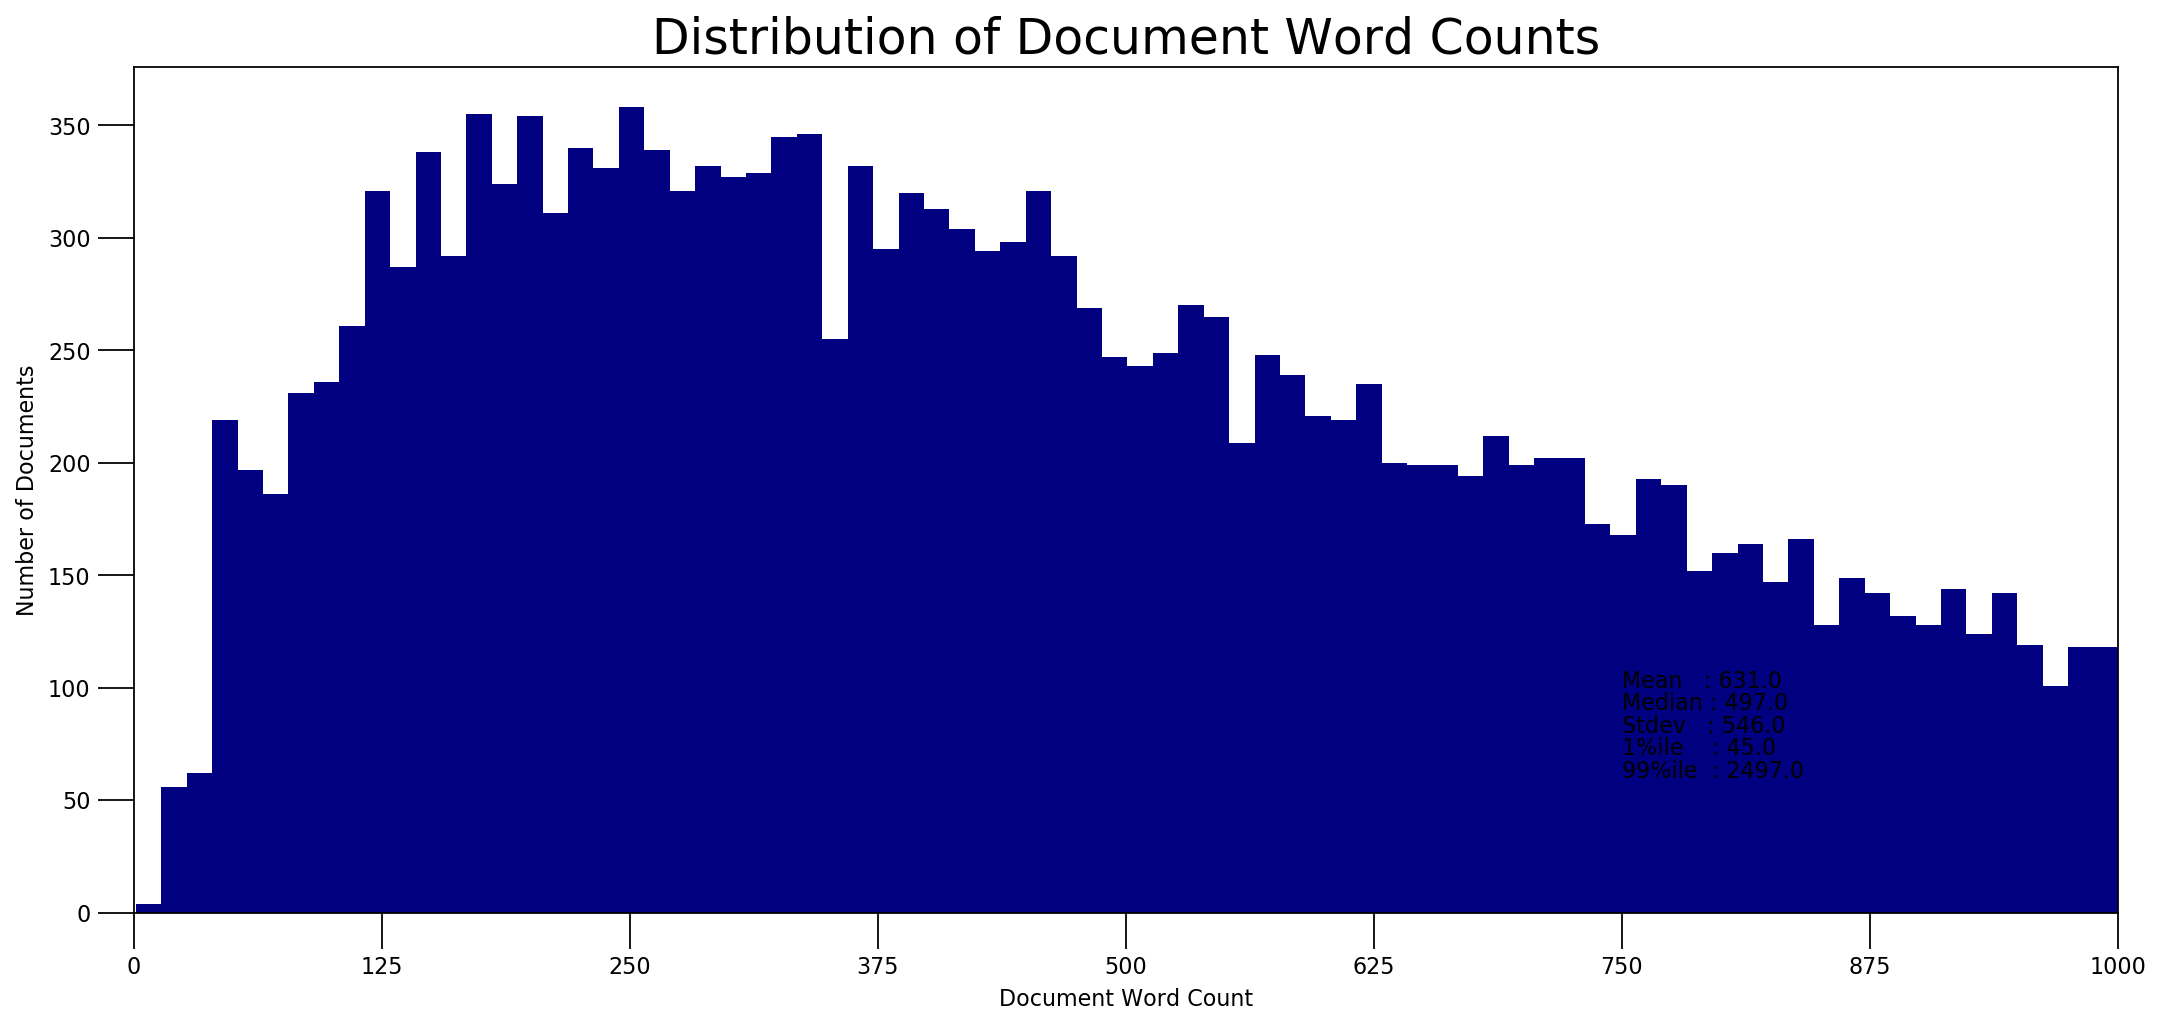

In [317]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


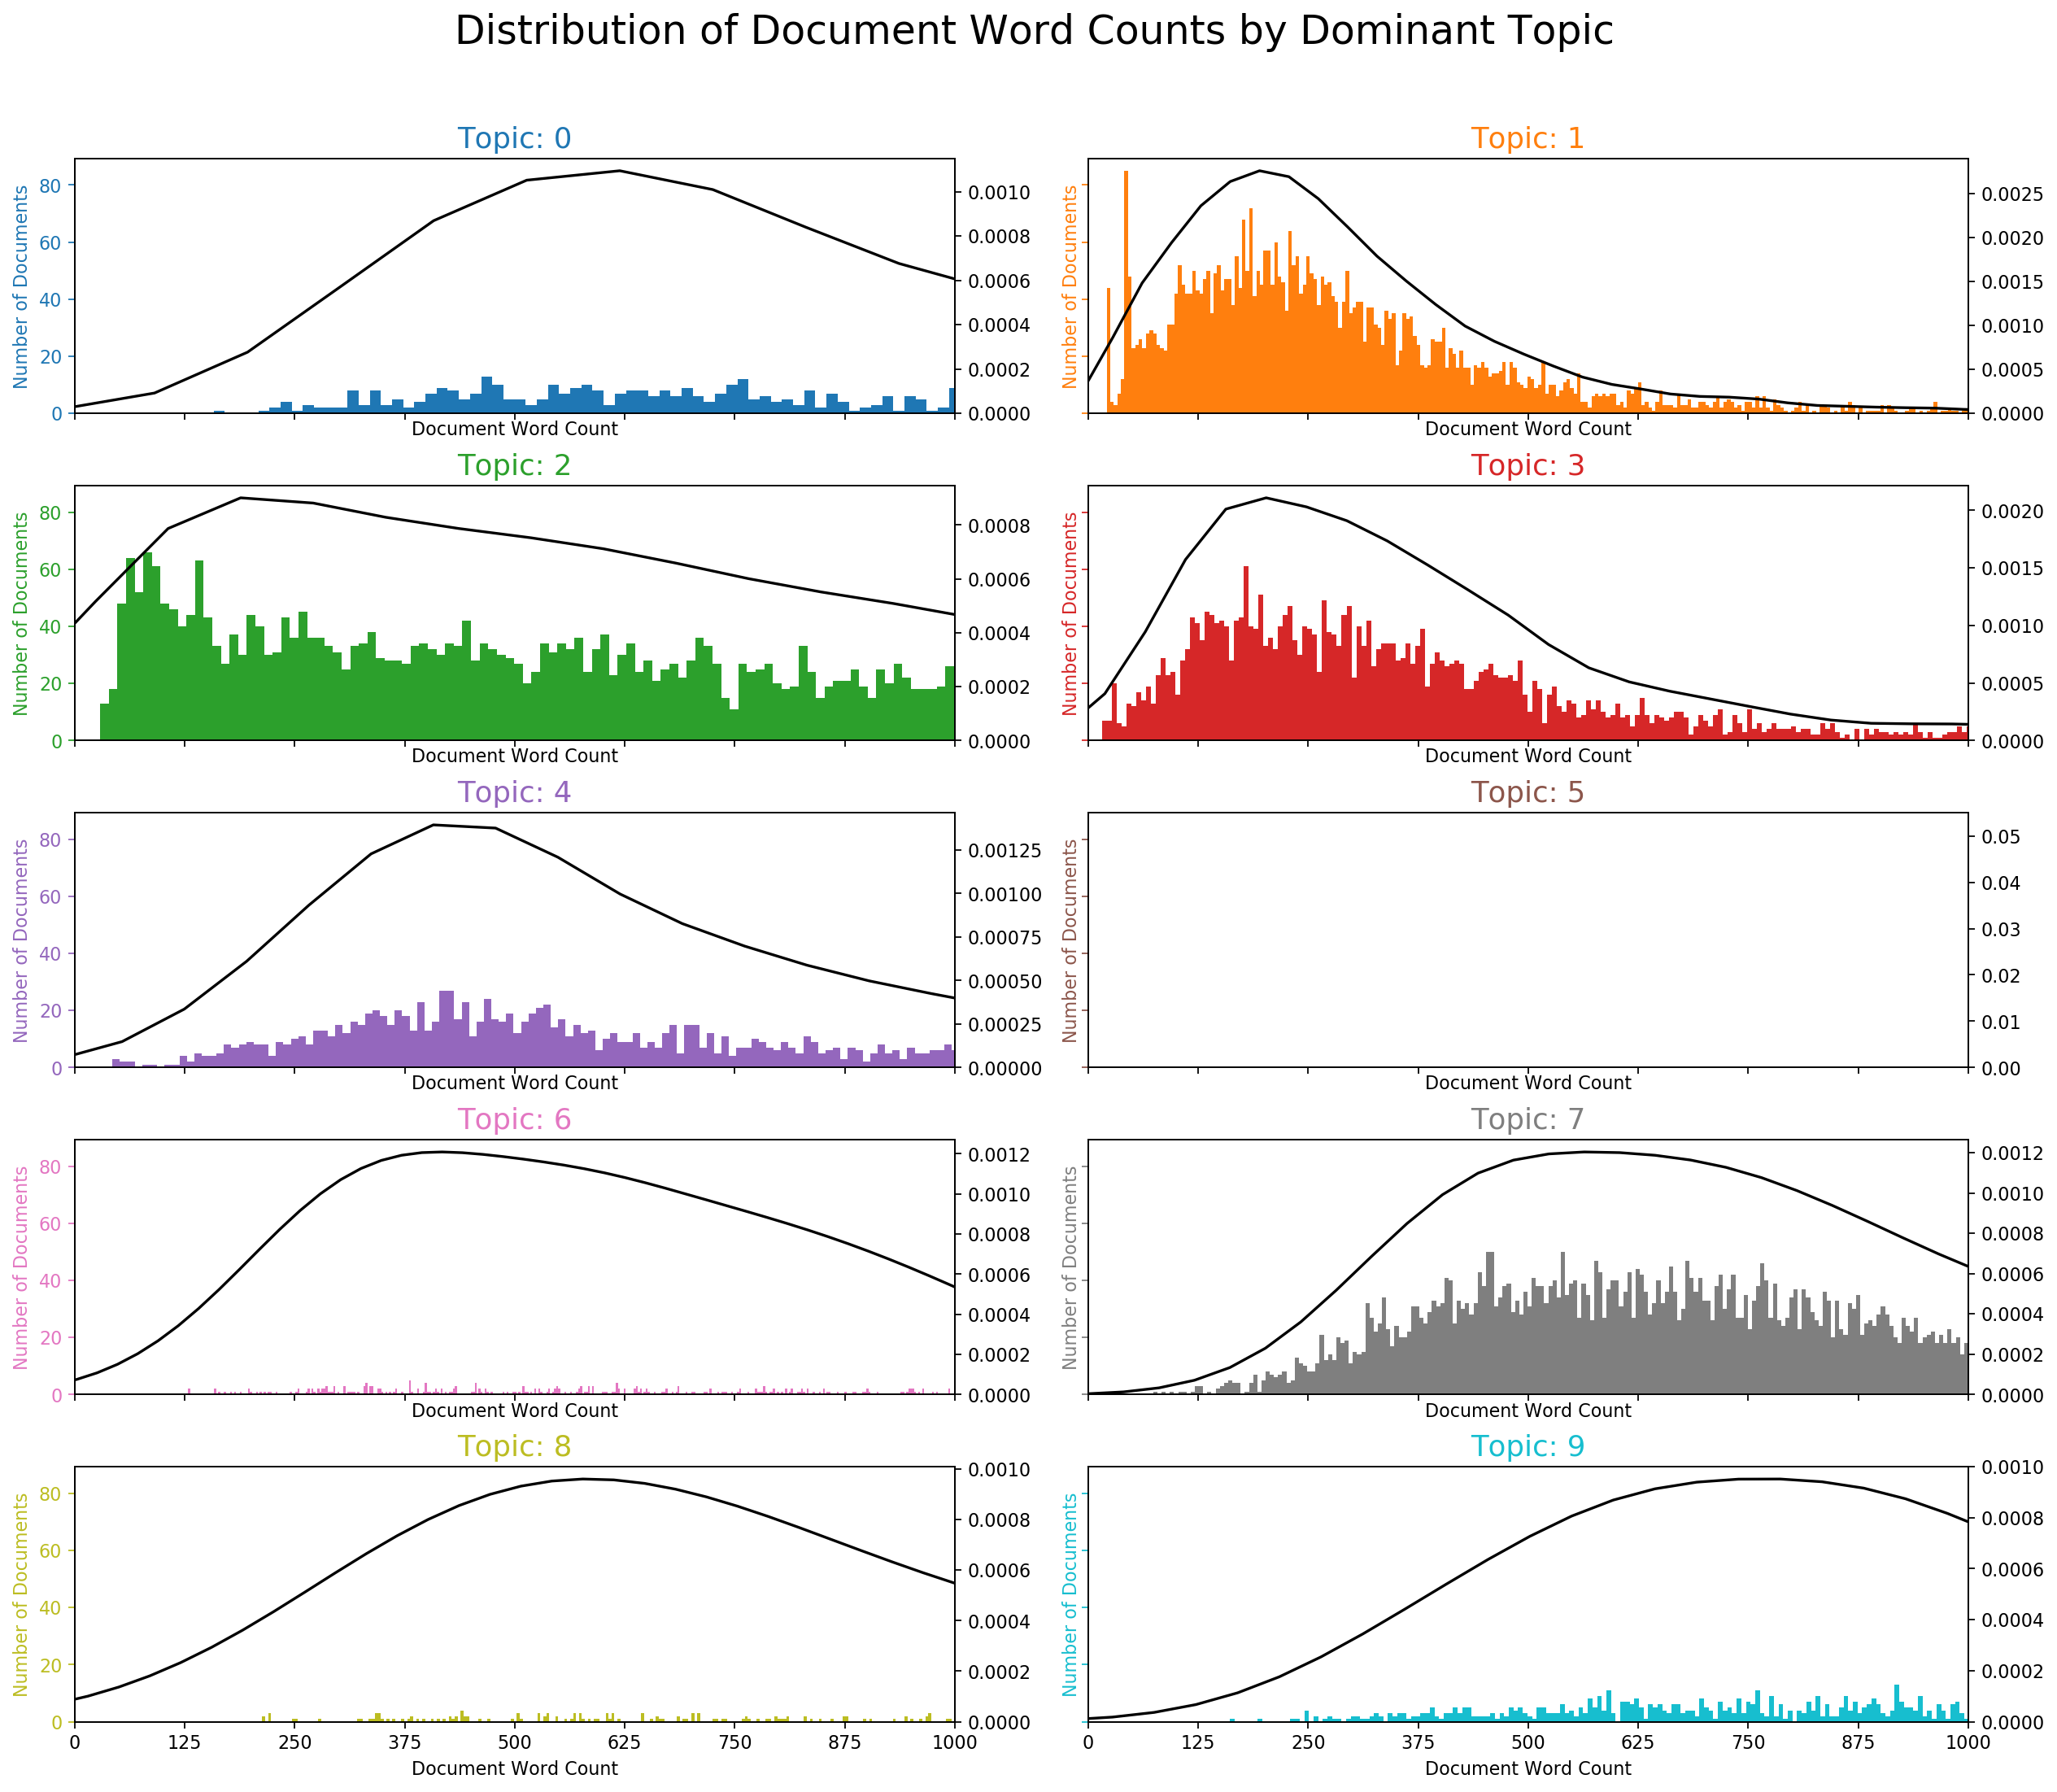

In [323]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

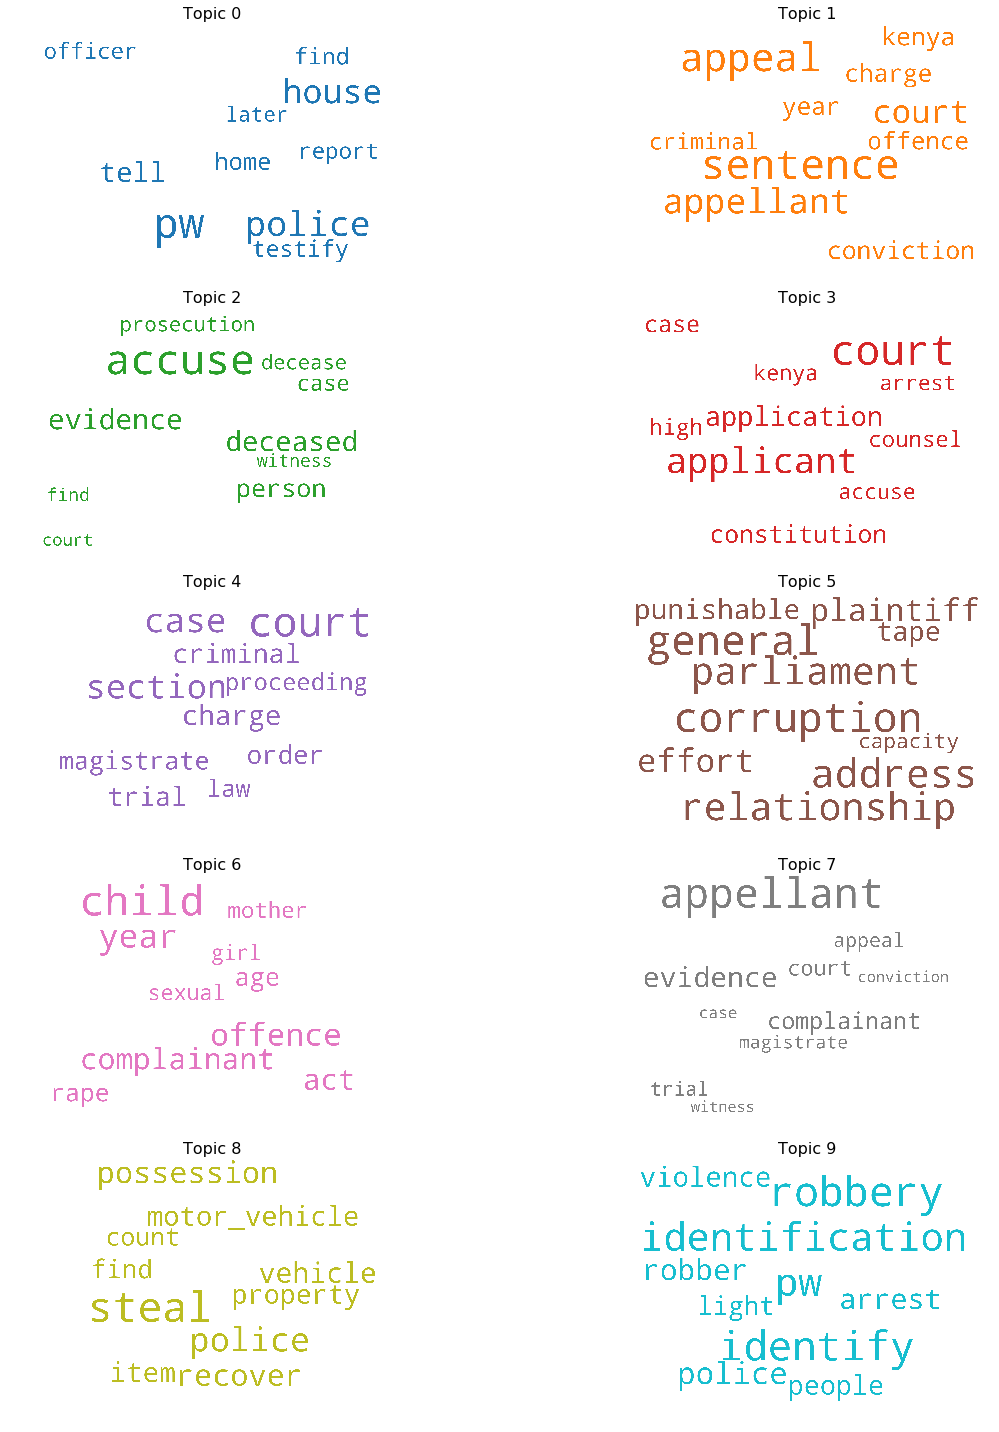

In [328]:
# 1. Wordcloud of Top N words in each topic
!pip install wordcloud

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

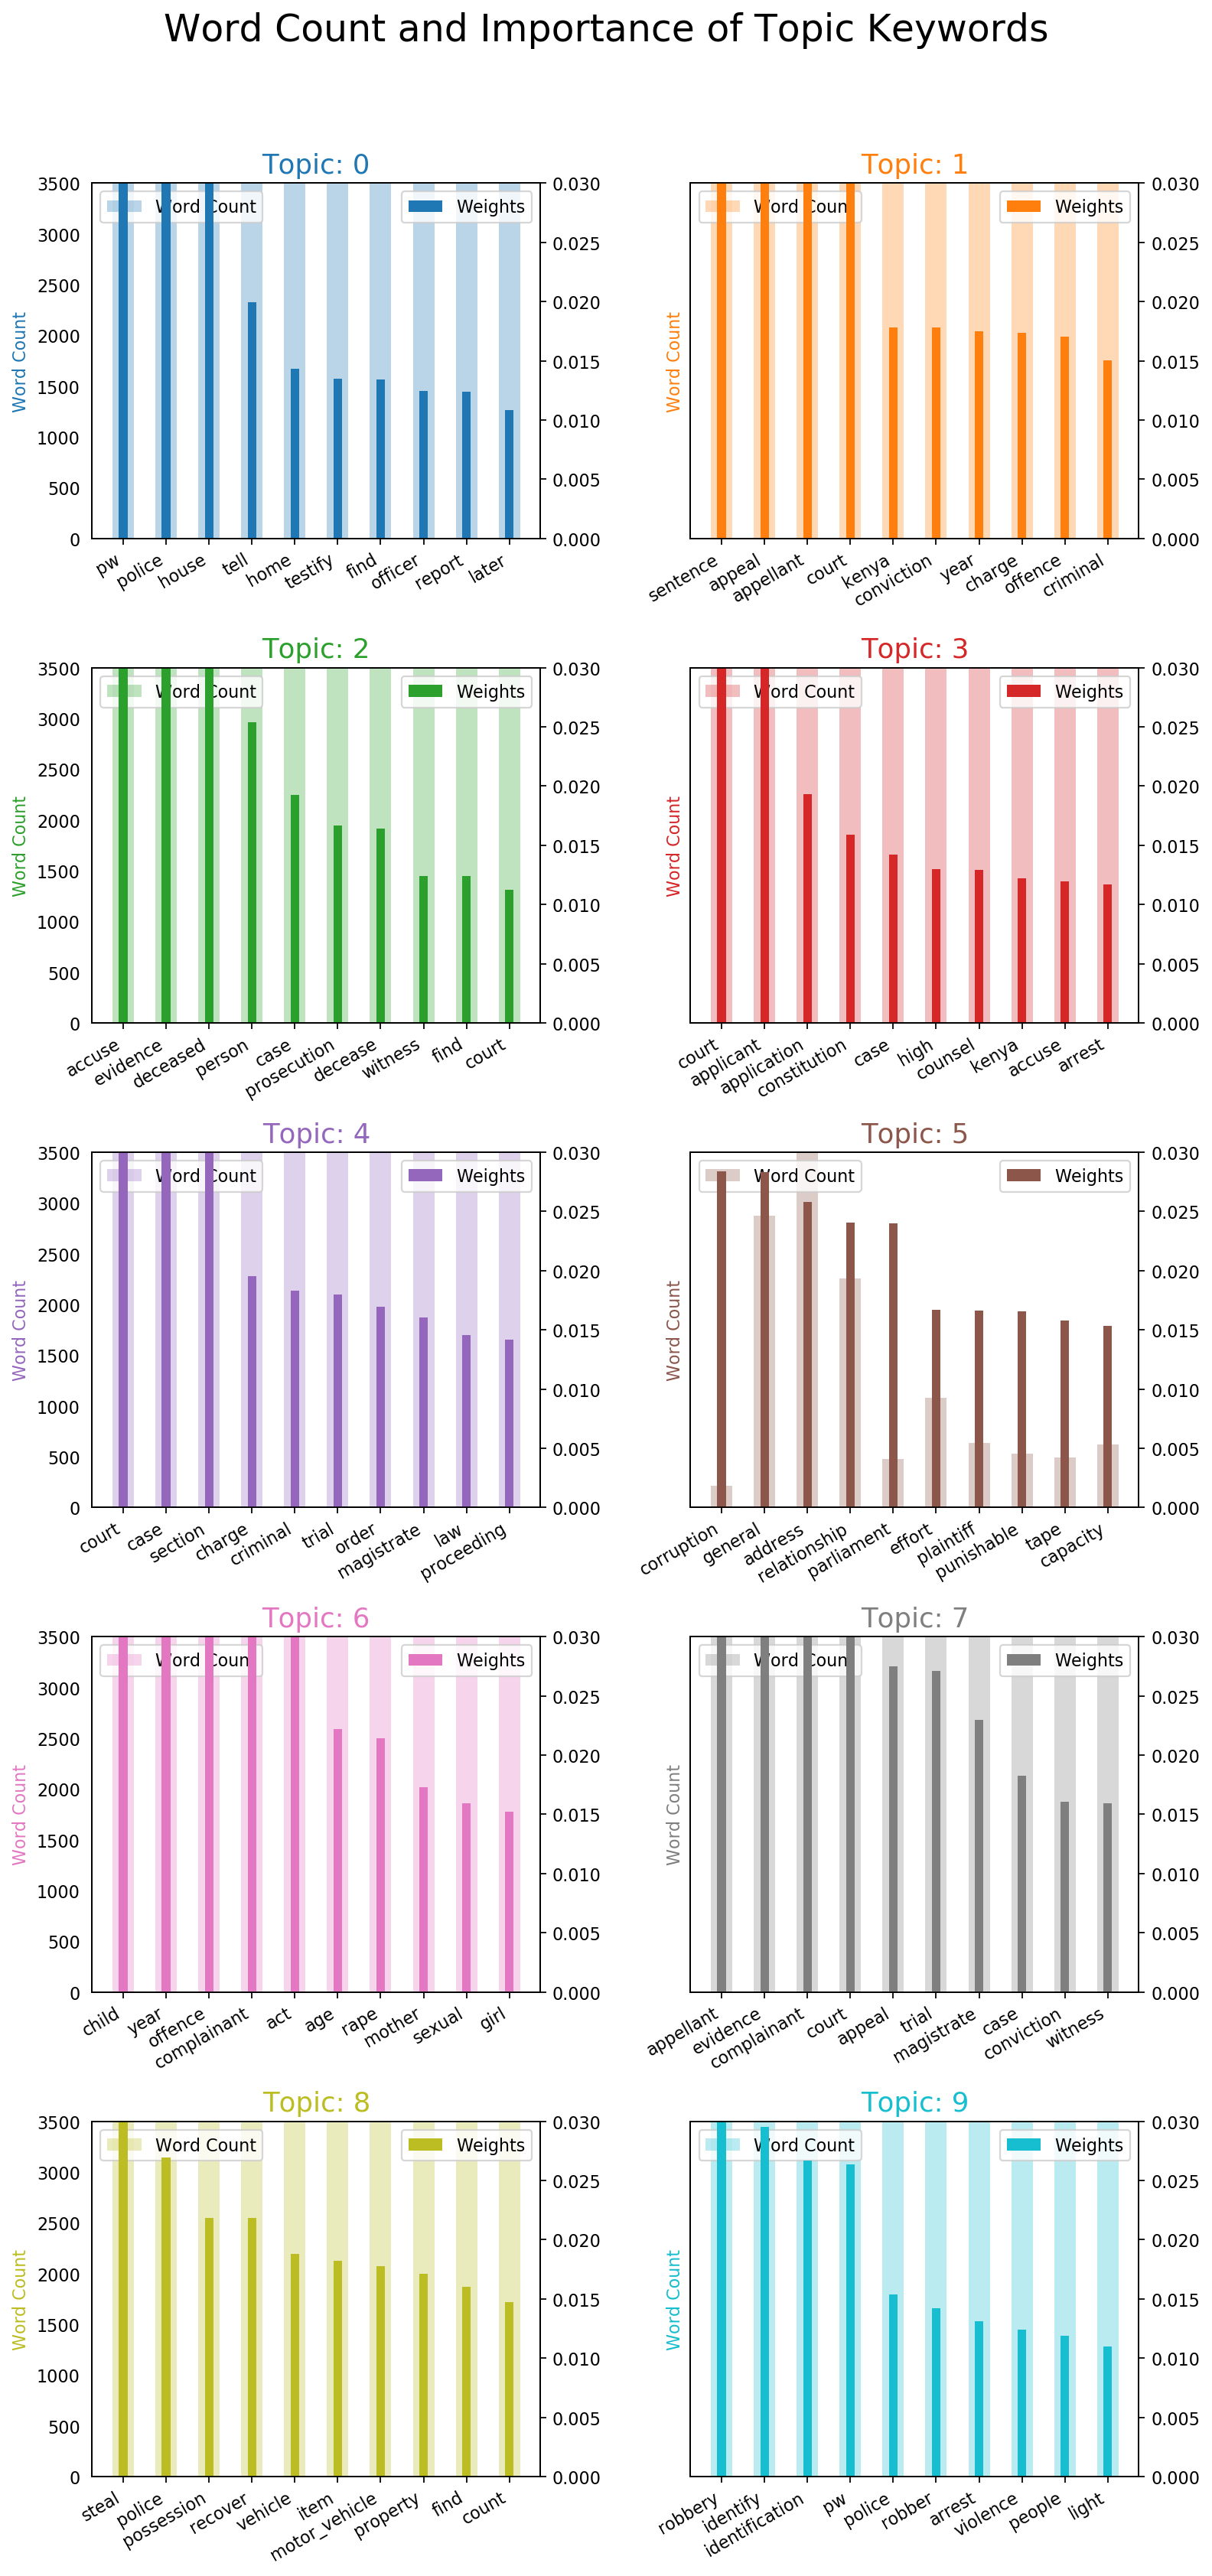

In [329]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

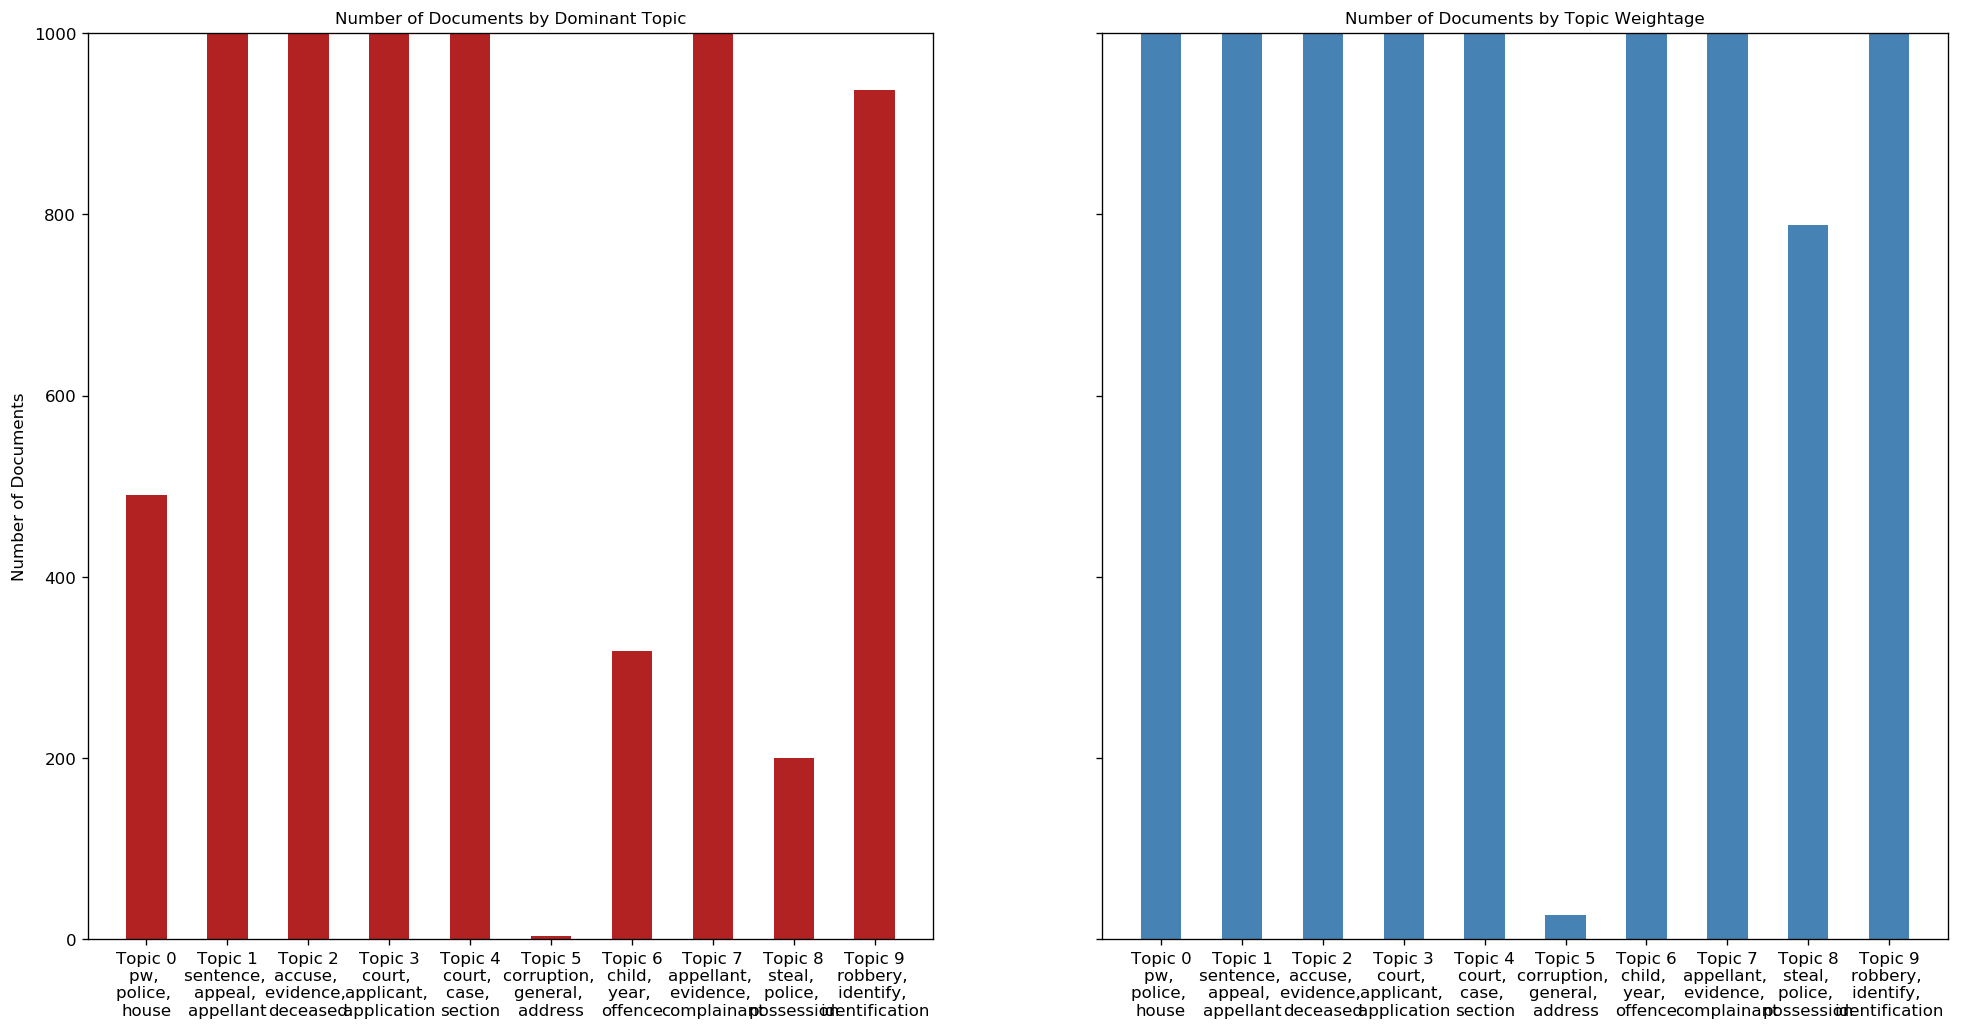

In [333]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

"""Let’s make two plots:

    The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
    The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents."""

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [341]:
#!pip install pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.213402  0.025742       1        1  18.108244
2      0.096318 -0.054452       2        1  17.327204
0     -0.123953 -0.195328       3        1  13.673988
1      0.209891  0.096907       4        1  11.671389
4      0.184602  0.018532       5        1  11.346174
3      0.154511 -0.017135       6        1   9.039527
9     -0.140560 -0.220196       7        1   8.722732
6     -0.040298  0.192645       8        1   5.103844
8     -0.223837 -0.170988       9        1   4.618340
5     -0.330075  0.324274      10        1   0.388558, topic_info=      Category           Freq            Term          Total  loglift  logprob
40     Default  472890.000000       appellant  472890.000000  30.0000  30.0000
0      Default  230690.000000          accuse  230690.000000  29.0000  29.0000
111    Default  222722.000000        evidence  222722.000000  28.0000  28.0000
38     Default  151539.000000          appeal  151539.000000  27.0000  27.0000
68     Default  118155.000000     complainant  118155.000000  26.0000  26.0000
6      Default  302148.000000           court  302148.000000  25.0000  25.0000
224    Default  109279.000000        sentence  109279.000000  24.0000  24.0000
204    Default  140103.000000              pw  140103.000000  23.0000  23.0000
60     Default   49729.000000           child   49729.000000  22.0000  22.0000
1142   Default   74054.000000        deceased   74054.000000  21.0000  21.0000
198    Default  105894.000000          police  105894.000000  20.0000  20.0000
256    Default   55575.000000            year   55575.000000  19.0000  19.0000
367    Default   45667.000000       applicant   45667.000000  18.0000  18.0000
135    Default   59118.000000           house   59118.000000  17.0000  17.0000
222    Default   94220.000000         section   94220.000000  16.0000  16.0000
185    Default   98891.000000         offence   98891.000000  15.0000  15.0000
161    Default  102875.000000      magistrate  102875.000000  14.0000  14.0000
3      Default  167718.000000            case  167718.000000  13.0000  13.0000
346    Default   36555.000000         robbery   36555.000000  12.0000  12.0000
248    Default  115809.000000           trial  115809.000000  11.0000  11.0000
457    Default   28181.000000           steal   28181.000000  10.0000  10.0000
27     Default   49534.000000             act   49534.000000   9.0000   9.0000
138    Default   36818.000000        identify   36818.000000   8.0000   8.0000
80     Default   69190.000000      conviction   69190.000000   7.0000   7.0000
137    Default   31888.000000  identification   31888.000000   6.0000   6.0000
1061   Default   38951.000000         decease   38951.000000   5.0000   5.0000
1006   Default   40974.000000            tell   40974.000000   4.0000   4.0000
196    Default  104674.000000          person  104674.000000   3.0000   3.0000
7      Default   83645.000000        criminal   83645.000000   2.0000   2.0000
254    Default   85676.000000         witness   85676.000000   1.0000   1.0000
...        ...            ...             ...            ...      ...      ...
17107  Topic10     722.128418       enactment     723.292480   5.5489  -4.3016
2761   Topic10     558.408447            task     559.572327   5.5484  -4.5587
621    Topic10     557.724976        averment     558.888855   5.5484  -4.5599
3730   Topic10     519.033691   supplementary     520.197693   5.5482  -4.6318
3740   Topic10     507.517944        wainaina     508.682129   5.5482  -4.6543
5159   Topic10     497.685669          uganda     498.849670   5.5481  -4.6738
1616   Topic10     464.275757       authorise     465.439789   5.5480  -4.7433
4236   Topic10     411.709991      githunguri     412.873810   5.5477  -4.8635
18347  Topic10     398.635193         joinder     399.800354   5.5476  -4.8958
7494   Topic10     393.733490         consist     394.897430   5.5475 